<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/RNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
require(nlme) #no problems here

In [ ]:
#install.packages("quantreg") #this takes quite a while 

In [265]:
require(quantreg) #now this is okay

# Static Patterns

In [317]:
gLV_Allee_01p1<-read.csv("gLV_Allee_0p1.csv", header=FALSE, dec=".")
masses<-read.csv("masses.csv", header=FALSE, dec=".")
gLV_Allee_01p1<-as.matrix(gLV_Allee_01p1)
masses<-as.matrix(masses)  
gLV_Allee_01p1[gLV_Allee_01p1<0.7]<-NaN

## Fitting the transient only

Warning message in matplot(1:100, gLV_Allee_01p1_transient, log = "y"):
“default 'pch' is smaller than number of columns and hence recycled”


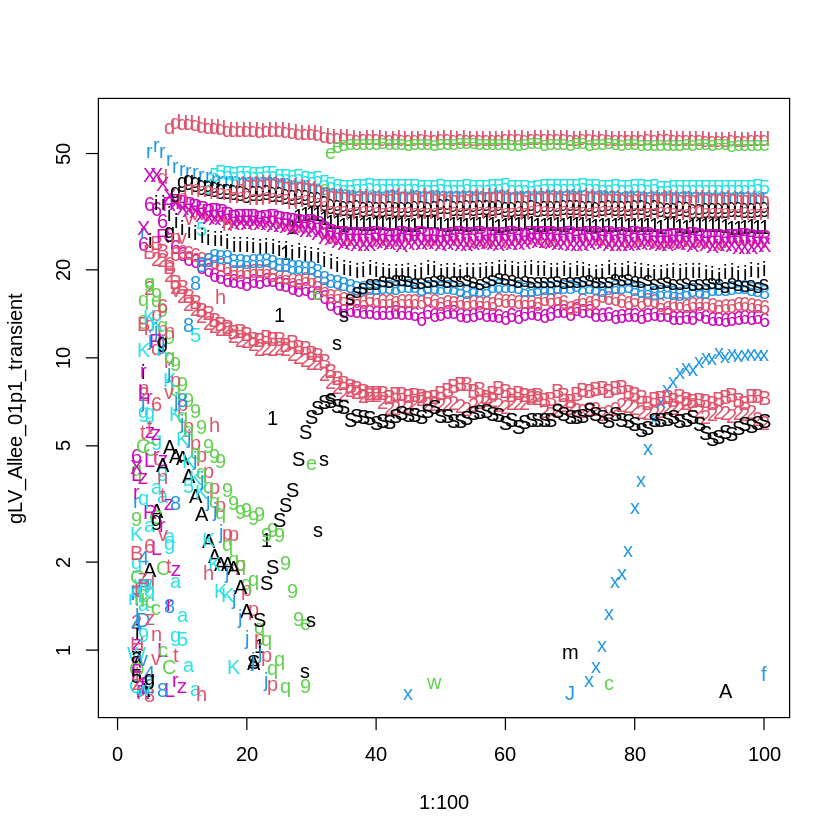

In [320]:
gLV_Allee_01p1_transient = gLV_Allee_01p1[1:100,]
matplot(1:100,gLV_Allee_01p1_transient,log="y")

Warning message in matplot(masses, t(gLV_Allee_01p1), log = "xy"):
“default 'pch' is smaller than number of columns and hence recycled”


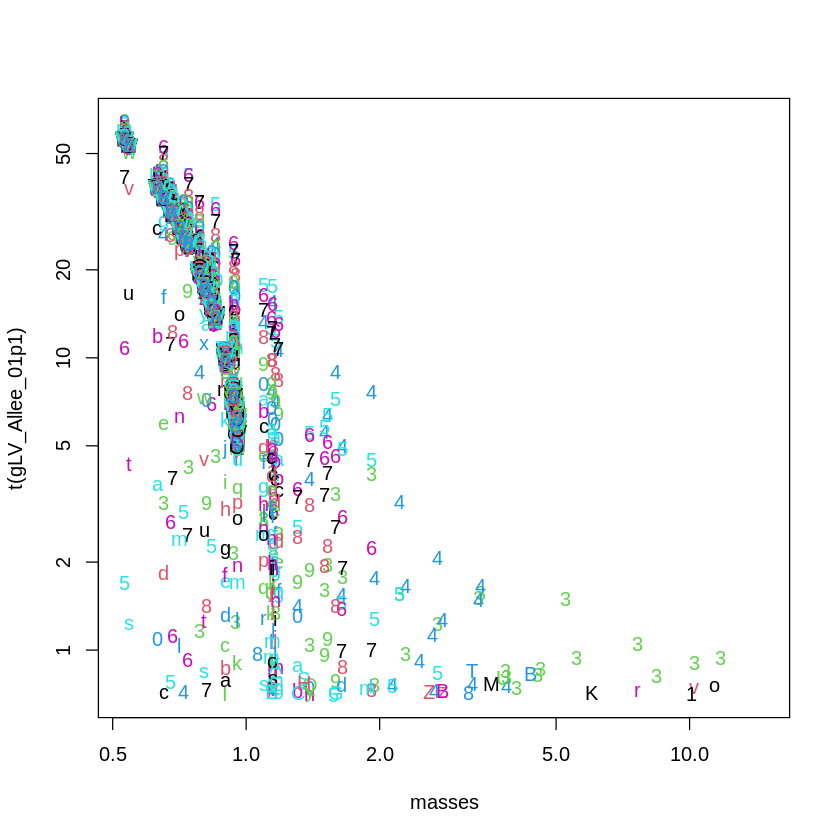

In [321]:
matplot(masses,t(gLV_Allee_01p1),log="xy")


Call:
lm(formula = logN_vec ~ logMvec)

Coefficients:
(Intercept)      logMvec  
      2.215       -2.678  

Call:
rq(formula = logN_vec ~ logMvec, tau = 0.99)

Coefficients:
(Intercept)     logMvec 
   3.204137   -1.420358 

Degrees of freedom: 1991 total; 1989 residual


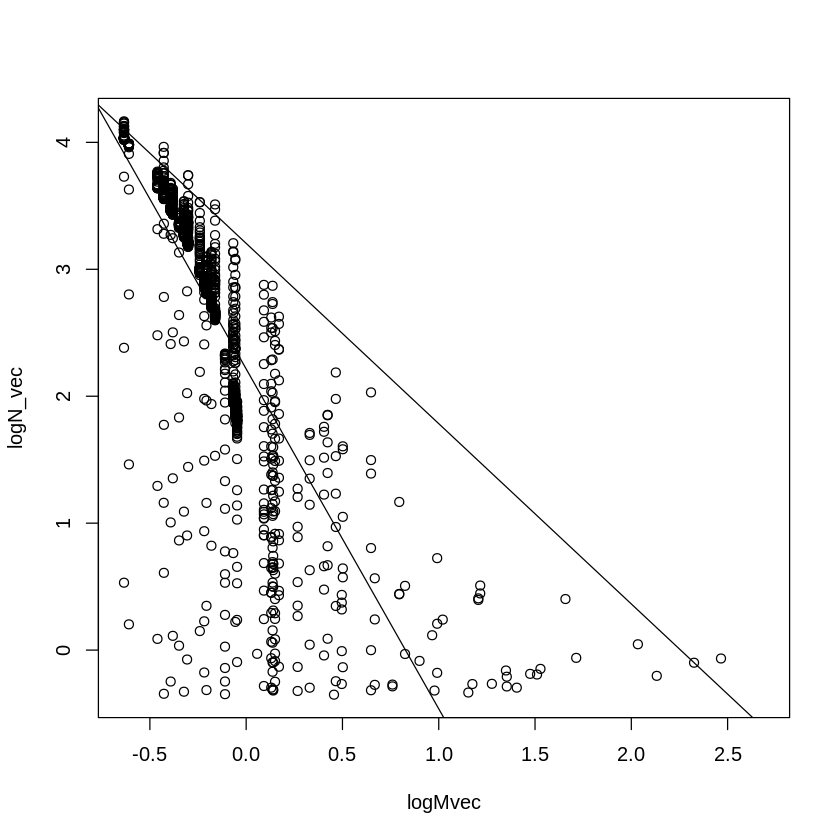

In [323]:
logN_mat = log(gLV_Allee_01p1_transient)
logM = log(masses)
TimeSteps = 100
logN_vec<-as.numeric(t(logN_mat))
logMvec<-rep(logM, TimeSteps) # TimeSteps is the number of time step of the abundance matrix
fit_sizeabundance<-lm(logN_vec~logMvec)
plot(logMvec, logN_vec)
fit_sizeabundance<-lm(logN_vec~logMvec)
abline(fit_sizeabundance)
fit_sizeabundance_q = rq(logN_vec~logMvec,tau = 0.99)
abline(fit_sizeabundance_q)
print(fit_sizeabundance)
print(fit_sizeabundance_q)

## Fitting the equilibrium

Warning message in matplot(900:1000, gLV_Allee_01p1_equilibrium, log = "y"):
“default 'pch' is smaller than number of columns and hence recycled”


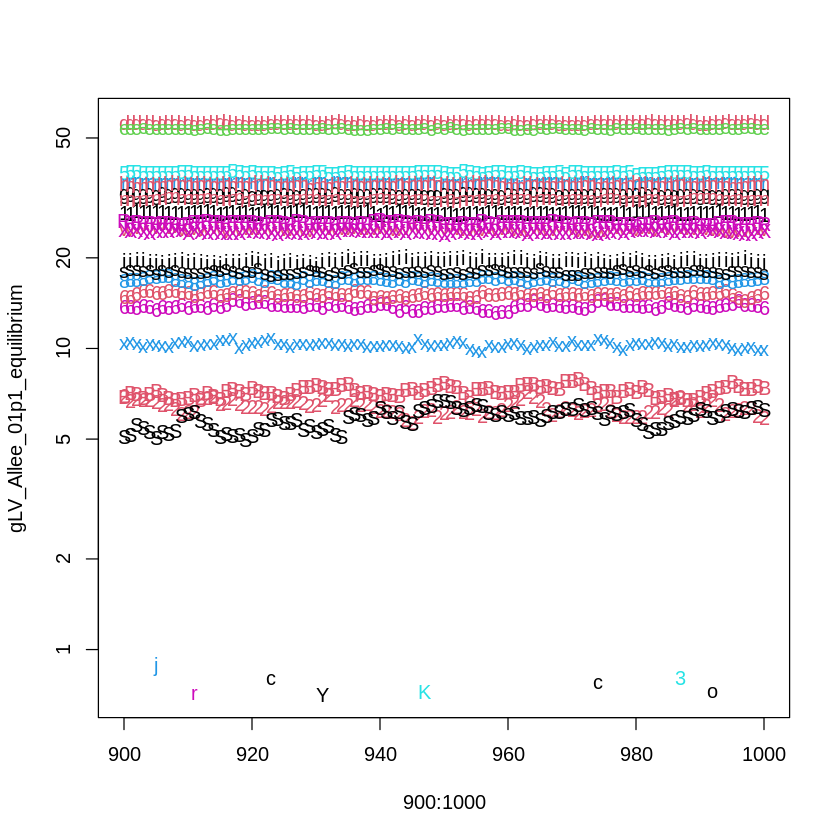

In [324]:
gLV_Allee_01p1_equilibrium = gLV_Allee_01p1[900:1000,]
matplot(900:1000,gLV_Allee_01p1_equilibrium,log="y")

Warning message in matplot(masses, t(gLV_Allee_01p1_equilibrium), log = "xy"):
“default 'pch' is smaller than number of columns and hence recycled”


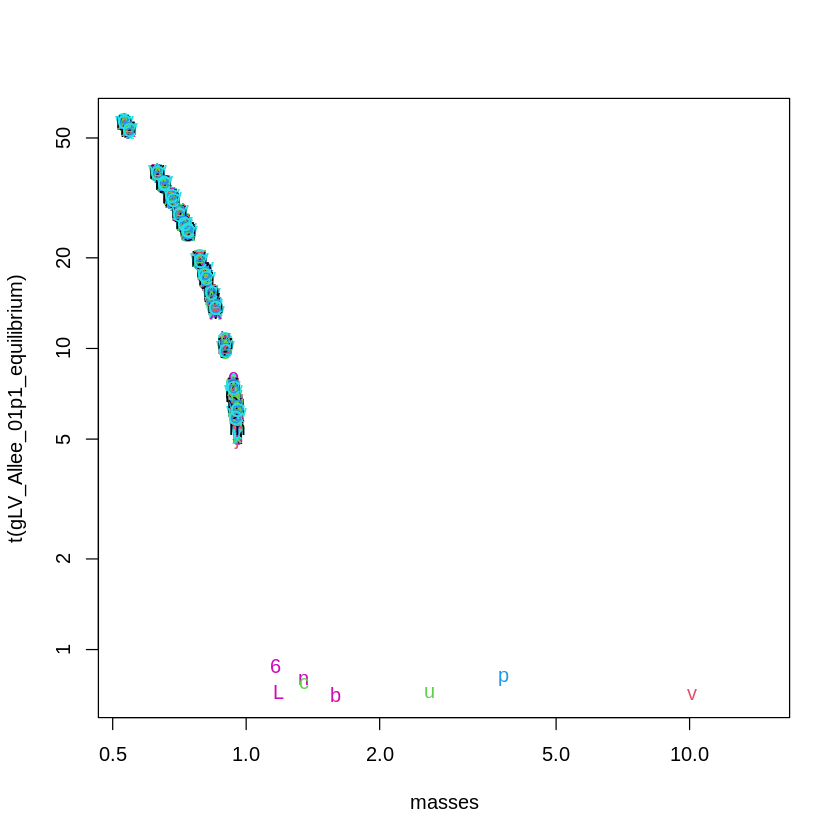

In [325]:
matplot(masses,t(gLV_Allee_01p1_equilibrium),log="xy")


Call:
lm(formula = logN_vec ~ logMvec)

Coefficients:
(Intercept)      logMvec  
      2.009       -3.472  

Call:
rq(formula = logN_vec ~ logMvec, tau = 0.99)

Coefficients:
(Intercept)     logMvec 
   2.620913   -2.237110 

Degrees of freedom: 2028 total; 2026 residual


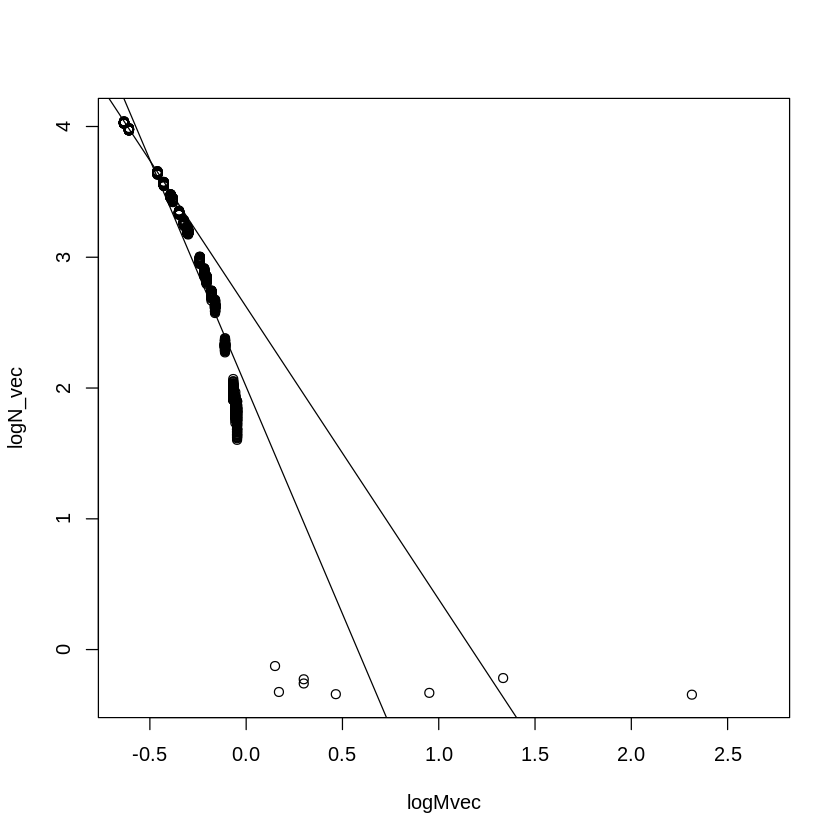

In [326]:
logN_mat = log(gLV_Allee_01p1_equilibrium)
logM = log(masses)
TimeSteps = 101
logN_vec<-as.numeric(t(logN_mat))
logMvec<-rep(logM, TimeSteps) # TimeSteps is the number of time step of the abundance matrix
fit_sizeabundance<-lm(logN_vec~logMvec)
plot(logMvec, logN_vec)
fit_sizeabundance<-lm(logN_vec~logMvec)
abline(fit_sizeabundance)
fit_sizeabundance_q = rq(logN_vec~logMvec,tau = 0.99)
abline(fit_sizeabundance_q)
print(fit_sizeabundance)
print(fit_sizeabundance_q)

# Laplace distribution

In [ ]:
install.packages("VGAM")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("VGAM"):
“installation of package ‘VGAM’ had non-zero exit status”


In [274]:
require(VGAM)

In [327]:
r_all<-apply(logN_mat,2, diff)

L_phyto1<-as.numeric(r_all); 
L_phyto<-L_phyto1[which(!is.na(L_phyto1))]

In [328]:
Fit_Control<-vglm.control(checkwz = TRUE, Check.rank = TRUE, Check.cm.rank = TRUE,criterion = "coefficients", epsilon = 1e-09, half.stepsizing = TRUE, 
          maxit = 150, noWarning = FALSE, stepsize = 0.1)

In [329]:
Lap_phyto= vglm(L_phyto~1, laplace, data.frame(Phyto=L_phyto), trace = TRUE, crit = "l", control=Fit_Control) # Ajusto dist de laplace a serie de datos
# SCALE
Coef(Lap_phyto)[2]

scale 
0.0110327

In [330]:
Coef(Lap_phyto)[1]

location 
-0.0001228762

In [331]:
Phyto_b<-summary(Lap_phyto)@coef3[2,1] 

Warning message in vcovvlm(object, ...):
“MLE regularity conditions were violated at the final iteration of the fitted object”


In [332]:
Phyto_seb<-summary(Lap_phyto)@coef3[2,2]

Warning message in vcovvlm(object, ...):
“MLE regularity conditions were violated at the final iteration of the fitted object”


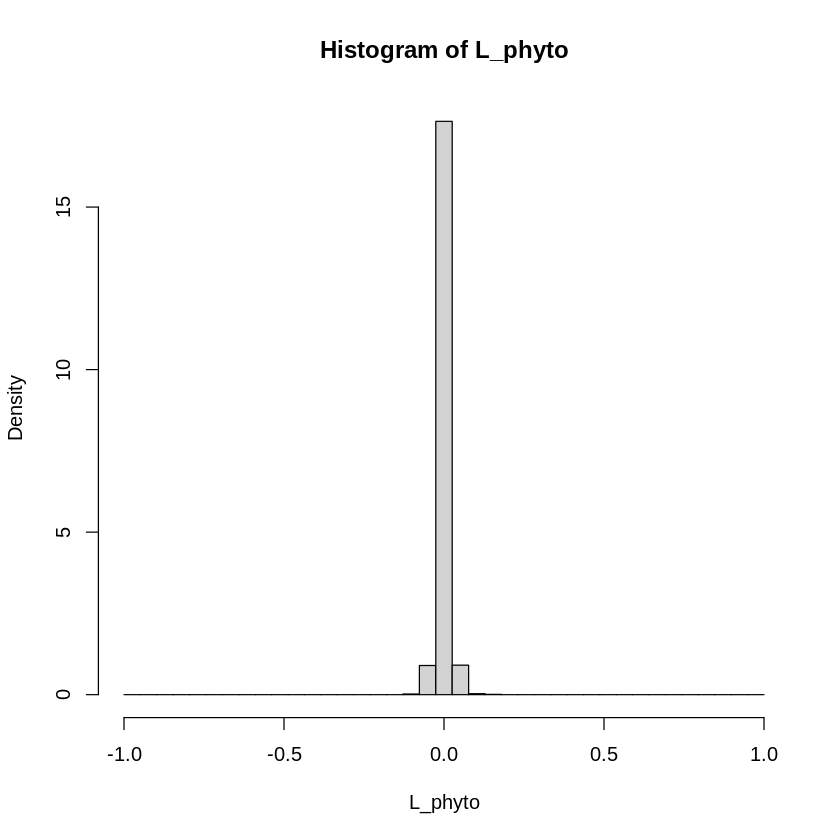

In [333]:
LENGTH<-40
hist_phyto<-hist(L_phyto, plot=TRUE, breaks=seq(floor(min(L_phyto)),ceiling(max(L_phyto)), length=LENGTH), prob=TRUE)

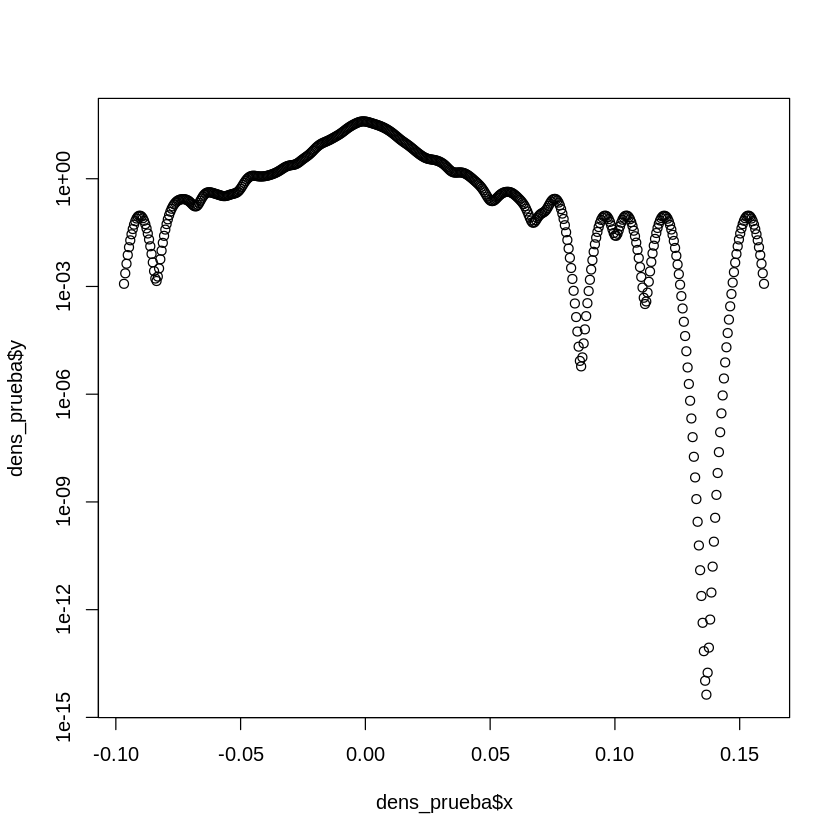

In [334]:
dens_prueba<-density(L_phyto)

# Other way of viewing this
plot(dens_prueba$x,dens_prueba$y,log="y")
#PlotLaplace(LapModel=Lap_phyto, range=range(dens_prueba$x), col="red", add=TRUE, log=FALSE)